## Libraries

In [2]:
# basic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib

# model
from sklearn.metrics import roc_auc_score, recall_score, precision_score, roc_curve
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

## Data

In [3]:
df = pd.read_csv("../data/mode_allcat.csv")
df.head()

,Y,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,...,Restaurant20To50_never,toCoupon_GEQ5min_1,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1,direction_same_0,direction_same_1,direction_opp_0,direction_opp_1
0,1,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
2,1,0,1,0,0,1,0,0,0,0,...,0,1,0,1,1,0,1,0,0,1
3,0,0,1,0,0,1,0,0,0,0,...,0,1,0,1,1,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,0,...,0,1,0,1,1,0,1,0,0,1


In [6]:
# prepare data
train, test = train_test_split(df, test_size=0.2, random_state=7)
train_x = train.drop(["Y"], axis=1)
test_x = test.drop(["Y"], axis=1)
train_y = np.ravel(train[["Y"]])
test_y = np.ravel(test[["Y"]])

## CatBoost ROC curve

In [7]:
cat = joblib.load("../Model PKL Files/CatBoostClassifier_mode_allcat.pkl").best_estimator_.named_steps.model
cat.fit(train_x, train_y)

0:	learn: 0.6738039	total: 64.6ms	remaining: 12.8s
1:	learn: 0.6551366	total: 69.1ms	remaining: 6.84s
2:	learn: 0.6411003	total: 73.5ms	remaining: 4.82s
3:	learn: 0.6297862	total: 77.6ms	remaining: 3.8s
4:	learn: 0.6222652	total: 82.2ms	remaining: 3.21s
5:	learn: 0.6131512	total: 86.9ms	remaining: 2.81s
6:	learn: 0.6050372	total: 91.8ms	remaining: 2.53s
7:	learn: 0.6006223	total: 97.4ms	remaining: 2.34s
8:	learn: 0.5955588	total: 102ms	remaining: 2.17s
9:	learn: 0.5912793	total: 107ms	remaining: 2.04s
10:	learn: 0.5865769	total: 112ms	remaining: 1.93s
11:	learn: 0.5832921	total: 117ms	remaining: 1.84s
12:	learn: 0.5799605	total: 122ms	remaining: 1.76s
13:	learn: 0.5754669	total: 127ms	remaining: 1.68s
14:	learn: 0.5721676	total: 132ms	remaining: 1.62s
15:	learn: 0.5696542	total: 137ms	remaining: 1.57s
16:	learn: 0.5670966	total: 141ms	remaining: 1.52s
17:	learn: 0.5646100	total: 146ms	remaining: 1.48s
18:	learn: 0.5616301	total: 152ms	remaining: 1.44s
19:	learn: 0.5590675	total: 156ms	

Model AUC = 0.834068649833341


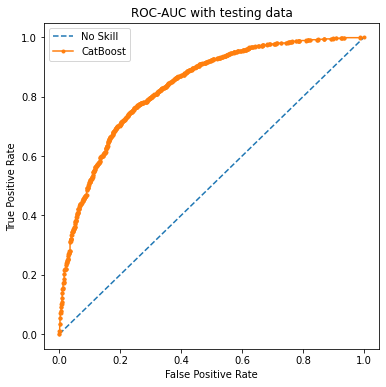

In [17]:
## plot ROC AUC
    
# get the probabilities for testing data
y_prob = cat.predict_proba(test_x)[:, 1]
# roc auc
line = [0 for _ in range(len(test_y))] # making straight line in ROC AUC graph (random guessing)
line_auc = roc_auc_score(test_y, line)
model_auc = roc_auc_score(test_y, y_prob)
print(f'Model AUC = {model_auc}') # see the AUC score of our model
# generate the curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, line)
lr_fpr, lr_tpr, _ = roc_curve(test_y, y_prob)
# plot the roc curve for the model
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax.plot(lr_fpr, lr_tpr, marker='.', label='CatBoost')
# axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title(f'ROC-AUC with testing data')
# show the legend
ax.legend()
# show the plot
plt.show()